<a href="https://colab.research.google.com/github/HoangSon2511/AI-Project/blob/main/TippingAndCooker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp37-cp37m-linux_x86_64.whl size=163999 sha256=a75ec4fb188f5984a48bdba6f7c9c179f955acf3d73400fec228def45ab51ec5
  Stored in directory: /root/.cache/pip/wheels/c8/52/8a/bb2d05fbf343752a8546682cb5b2d775cc0d1f27f6c43f95dd
Successfully built fuzzy


In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 38.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a436a844a58169401ce809163e9855f90d5164503ef0d275407cce47ea6de89a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzz

In [ ]:
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

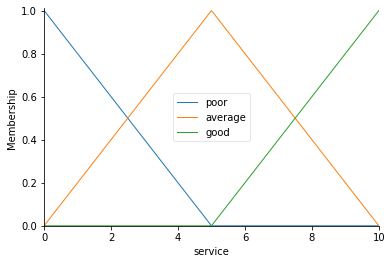

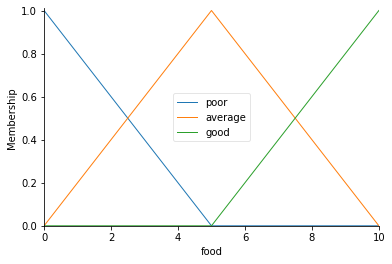

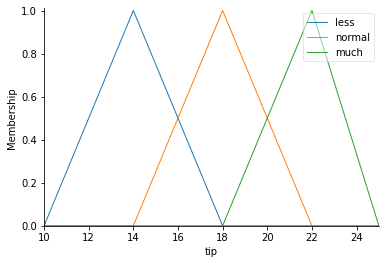

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])

service.view()
food.view()
tip.view()


In [ ]:
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule3 = ctrl.Rule(food['good'] & service['good'], tip['much'])
rule4 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule5 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['normal'])
rule9 = ctrl.Rule(food['average'] & service['good'], tip['normal'])

16.655967078189303


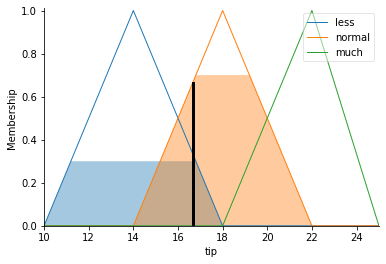

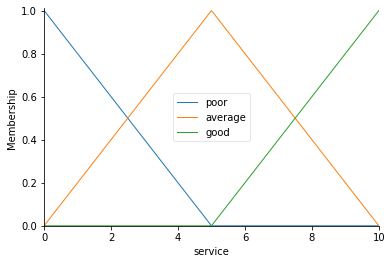

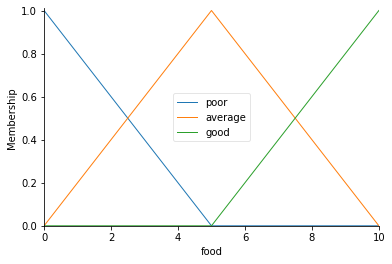

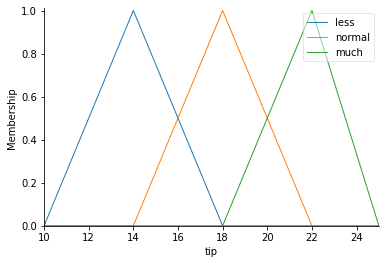

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,14,18])
tip['normal'] = fuzz.trimf(tip.universe,[14,18,22])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule3 = ctrl.Rule(food['good'] & service['good'], tip['much'])
rule4 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule5 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['normal'])
rule9 = ctrl.Rule(food['average'] & service['good'], tip['normal'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.2
tipping.input['service'] = 3.5
tipping.compute()
print(tipping.output['tip'])

tip.view(sim = tipping)

service.view()
food.view()
tip.view()

79.60544217687068


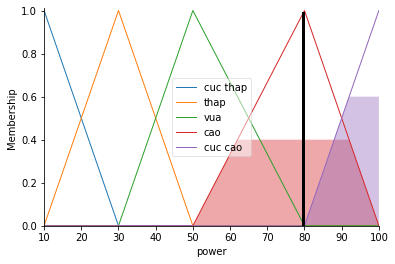

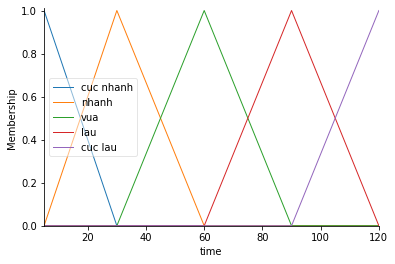

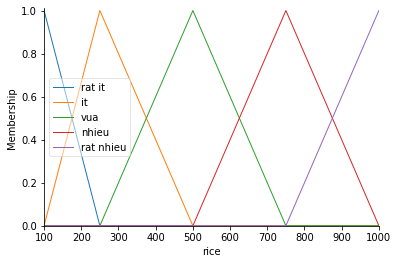

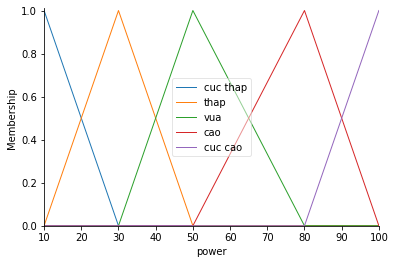

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(5,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1), 'rice')
power = ctrl.Consequent(np.arange(10,101,1),'power')

time['cuc nhanh'] = fuzz.trimf(time.universe, [5,5,30])
time['nhanh'] = fuzz.trimf(time.universe,[5,30,60])
time['vua'] = fuzz.trimf(time.universe, [30,60,90])
time['lau'] = fuzz.trimf(time.universe, [60,90,120])
time['cuc lau'] = fuzz.trimf(time.universe, [90,120,120])

rice['rat it'] = fuzz.trimf(rice.universe, [100,100,250])
rice['it'] = fuzz.trimf(rice.universe, [100,250,500])
rice['vua'] = fuzz.trimf(rice.universe, [250,500,750])
rice['nhieu'] = fuzz.trimf(rice.universe, [500,750,1000])
rice['rat nhieu'] = fuzz.trimf(rice.universe, [750,1000,1000])

power['cuc thap'] = fuzz.trimf(power.universe, [10,10,30])
power['thap'] = fuzz.trimf(power.universe, [10,30,50])
power['vua'] = fuzz.trimf(power.universe, [30,50,80])
power['cao'] = fuzz.trimf(power.universe, [50,80,100])
power['cuc cao'] = fuzz.trimf(power.universe, [80,100,100])

rule1 = ctrl.Rule(time['cuc nhanh'] & rice['rat it'], power['cuc thap'])
rule2 = ctrl.Rule(time['cuc nhanh'] & rice['it'], power['thap'])
rule3 = ctrl.Rule(time['cuc nhanh'] & rice['vua'], power['vua'])
rule4 = ctrl.Rule(time['cuc nhanh'] & rice['nhieu'], power['cao'])
rule5 = ctrl.Rule(time['cuc nhanh'] & rice['rat nhieu'], power['cuc cao'])
rule6 = ctrl.Rule(time['nhanh'] & rice['rat it'], power['cuc thap'])
rule7 = ctrl.Rule(time['nhanh'] & rice['it'], power['cuc thap'])
rule8 = ctrl.Rule(time['nhanh'] & rice['vua'], power['thap'])
rule9 = ctrl.Rule(time['nhanh'] & rice['nhieu'], power['vua'])
rule10 = ctrl.Rule(time['nhanh'] & rice['rat nhieu'], power['cao'])
rule11 = ctrl.Rule(time['vua'] & rice['rat it'], power['cuc thap'])
rule12 = ctrl.Rule(time['vua'] & rice['it'], power['cuc thap'])
rule13 = ctrl.Rule(time['vua'] & rice['vua'], power['cuc thap'])
rule14 = ctrl.Rule(time['vua'] & rice['nhieu'], power['thap'])
rule15 = ctrl.Rule(time['vua'] & rice['rat nhieu'], power['vua'])
rule16 = ctrl.Rule(time['lau'] & rice['rat it'], power['cuc thap'])
rule17 = ctrl.Rule(time['lau'] & rice['it'], power['cuc thap'])
rule18 = ctrl.Rule(time['lau'] & rice['vua'], power['cuc thap'])
rule19 = ctrl.Rule(time['lau'] & rice['nhieu'], power['cuc thap'])
rule20 = ctrl.Rule(time['lau'] & rice['rat nhieu'], power['thap'])
rule21 = ctrl.Rule(time['cuc lau'] & rice['rat it'], power['cuc thap'])
rule22 = ctrl.Rule(time['cuc lau'] & rice['it'], power['cuc thap'])
rule23 = ctrl.Rule(time['cuc lau'] & rice['vua'], power['cuc thap'])
rule24 = ctrl.Rule(time['cuc lau'] & rice['nhieu'], power['cuc thap'])
rule25 = ctrl.Rule(time['cuc lau'] & rice['rat nhieu'], power['cuc thap'])

powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['time'] = 15
powering.input['rice'] = 1000
powering.compute()
print(powering.output['power'])



power.view(sim = powering)

time.view()
rice.view()
power.view()